In [20]:
#initial api query
#DO NOT RUN

# import requests
# import pandas as pd
# import numpy as np
# from pandas import json_normalize

# url = "https://meteostat.p.rapidapi.com/point/monthly"
# querystring = {"lat":41.505493,"lon": -81.681290,"start":"1950-01-01","end":"2023-12-31","units":"imperial"}
# headers = {
# 	"x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
# 	"x-rapidapi-host": "meteostat.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# data = response.json()
# #print(data)
# info = json_normalize(data)
# #print(info.iloc[0][0])

# table = pd.DataFrame(info.iloc[0][0])
# print(table.info)
# print(table.iloc[0]['tavg'])

# table.to_csv('Raw Cleveland Weather.csv')

     Unnamed: 0        date  tavg  tmin  tmax   prcp  wspd    pres  tsun
0             0  1950-01-01  36.3  27.7  45.9  7.020  12.6  1021.5   NaN
1             1  1950-02-01  27.9  21.9  36.5  4.646  11.7  1019.8   NaN
2             2  1950-03-01  30.6  24.4  41.5  4.268  13.5  1015.6   NaN
3             3  1950-04-01  41.0  33.8  52.0  5.909  13.5  1016.2   NaN
4             4  1950-05-01  58.5  48.6  72.7  3.217  10.2  1015.7   NaN
..          ...         ...   ...   ...   ...    ...   ...     ...   ...
835         835  2019-08-01  73.0  64.2  81.9  3.228   7.6  1015.7   NaN
836         836  2019-09-01  71.2  61.2  81.3  1.299   8.0  1018.7   NaN
837         837  2019-10-01  57.6  47.5  68.4  3.307   9.4  1017.2   NaN
838         838  2019-11-01  38.8  31.6  46.2  1.693  10.1  1019.7   NaN
839         839  2019-12-01  38.3  30.7  45.1  2.835  10.4  1017.9   NaN

[840 rows x 9 columns]


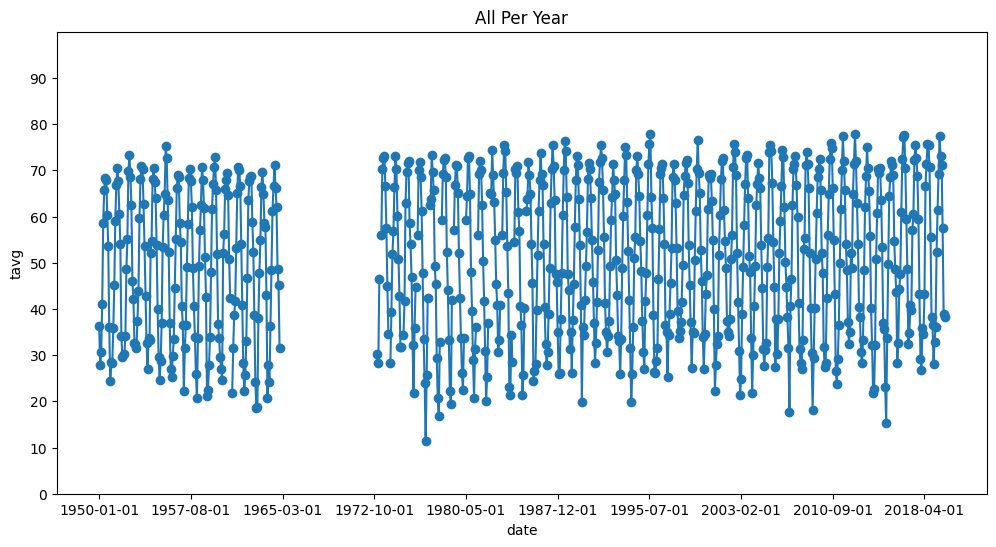

In [21]:
#exploratory monthly temperature plot

import pandas as pd
import matplotlib.pyplot as plt

table = pd.read_csv('Datasets/Raw Cleveland Weather.csv')

plt.figure(figsize=(12, 6))
print(table.iloc[0:840:])
plt.plot(table.iloc[0:840]['date'], table.iloc[0:840]['tavg'], marker='o')

plt.title('All Per Year')
plt.xlabel('date')
plt.ylabel('tavg')

plt.xticks(table[0:840:91]['date'])
plt.ylim(0, 100)
plt.yticks(range(0, 100, 10))
plt.show()

     Unnamed: 0        date  tavg  tmin  tmax   prcp  wspd    pres  tsun  \
0             0  1950-01-01  36.3  27.7  45.9  7.020  12.6  1021.5   NaN   
1             1  1950-02-01  27.9  21.9  36.5  4.646  11.7  1019.8   NaN   
2             2  1950-03-01  30.6  24.4  41.5  4.268  13.5  1015.6   NaN   
3             3  1950-04-01  41.0  33.8  52.0  5.909  13.5  1016.2   NaN   
4             4  1950-05-01  58.5  48.6  72.7  3.217  10.2  1015.7   NaN   
..          ...         ...   ...   ...   ...    ...   ...     ...   ...   
883         883  2023-08-01  70.7  62.4  79.0  6.374   7.6  1015.3   NaN   
884         884  2023-09-01  67.1  58.8  75.2  0.772   6.8  1019.6   NaN   
885         885  2023-10-01  56.7  49.5  64.4  4.913   9.1  1016.3   NaN   
886         886  2023-11-01  43.5  34.7  52.0  1.941   9.7  1020.9   NaN   
887         887  2023-12-01  41.9  36.7  47.5  3.331   8.5  1019.8   NaN   

     Year  Month  
0    1950      1  
1    1950      2  
2    1950      3  
3    1950  

/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_2923/2671220190.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  frame['tavg'][j] = replace
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_2923/2671220190.py:37: Sett

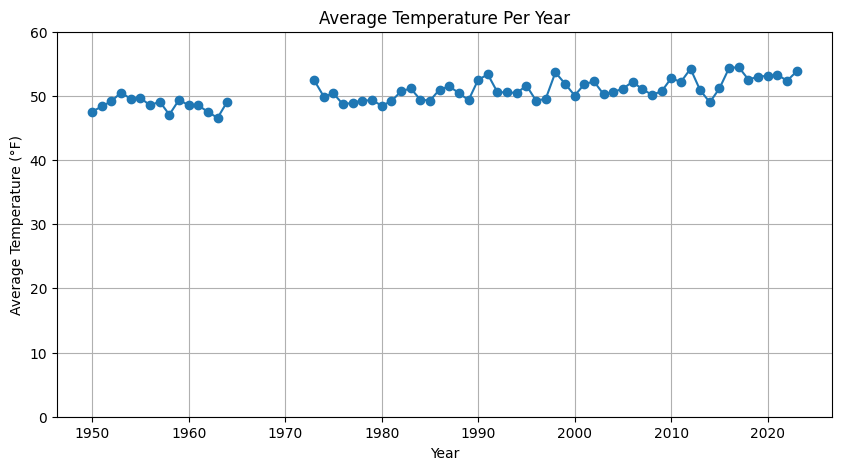

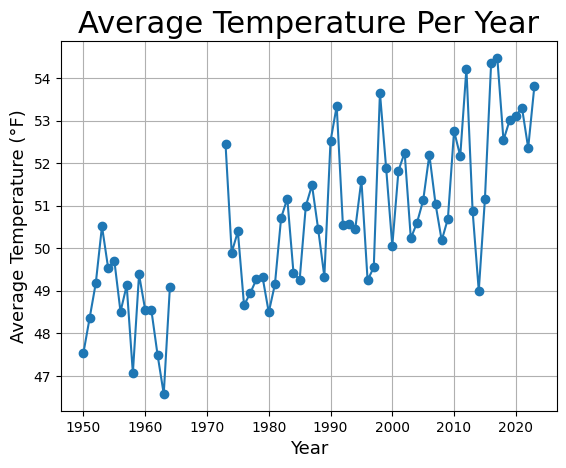

In [22]:
#graphing temperature change over time

# API request- do not need to run
# import requests
# import pandas as pd
# from pandas import json_normalize

# url = "https://meteostat.p.rapidapi.com/point/monthly"
# querystring = {"lat":41.505493,"lon": -81.681290,"start":"1950-01-01","end":"2023-12-31","units":"imperial"}
# headers = {
# 	"x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
# 	"x-rapidapi-host": "meteostat.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# #organizing output into dataframe
# data = response.json()
# info = json_normalize(data)
# table = pd.DataFrame(info.iloc[0][0])


#loop to impute missing monthly temp values, used and developed by both group members
import numpy as np
table = pd.read_csv('Datasets/Raw Cleveland Weather.csv')
table['Year'] = pd.to_datetime(table['date']).dt.year
table['Month'] = pd.to_datetime(table['date']).dt.month
print(table)
frames = []
for i in range(1, 13):
    frame = table[table.Month == i]
    frame.reset_index(inplace=True)
    print(frame)
    replace = np.nanmean(frame['tavg'])
    for j in range(0, len(frame)):
        if np.isnan(frame['tavg'][j]):
            frame['tavg'][j] = replace
    frames.append(frame)

print(frames[0])

table = pd.concat(frames)

#impute nan values for years with no data
for i in range(15,23):
    table['tavg'][i] = np.nan


#find yearly averages
yearly_avg_temp = table.groupby('Year')['tavg'].mean().reset_index() 
print(yearly_avg_temp)

yearly_avg_temp.to_csv('TempvCO2.csv')

#plot average temperature line plots
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_temp['Year'], yearly_avg_temp['tavg'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.yticks(range(0,70,10))
plt.title('Average Temperature Per Year')
plt.grid(True)
plt.show()

plt.plot(yearly_avg_temp['Year'], yearly_avg_temp['tavg'], marker='o')
plt.xlabel('Year', fontdict={'size':13})
plt.ylabel('Average Temperature (°F)', fontdict={'size':13})
plt.title('Average Temperature Per Year', fontdict={'size':22})
plt.grid(True)
plt.show()

In [23]:
#computing aggregate CO2 emissions

import pandas as pd 
total_df = pd.read_csv('Datasets/annual-co2-emissions-per-country.csv')
print(total_df)
total_df = total_df[total_df['Entity'] == 'World']
total_df
# total_per_year = total_df.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()
# total_per_year.columns = ['Year', 'Total CO2 Emissions']
# print(total_per_year)
# total_per_year[230:].to_csv('TempvCO2.csv')


            Entity Code  Year  Annual CO₂ emissions
0      Afghanistan  AFG  1949               14656.0
1      Afghanistan  AFG  1950               84272.0
2      Afghanistan  AFG  1951               91600.0
3      Afghanistan  AFG  1952               91600.0
4      Afghanistan  AFG  1953              106256.0
...            ...  ...   ...                   ...
30303     Zimbabwe  ZWE  2018            10714598.0
30304     Zimbabwe  ZWE  2019             9775428.0
30305     Zimbabwe  ZWE  2020             7849639.0
30306     Zimbabwe  ZWE  2021             8396158.0
30307     Zimbabwe  ZWE  2022             8855981.0

[30308 rows x 4 columns]


,Entity,Code,Year,Annual CO₂ emissions
29769,World,OWID_WRL,1750,9.305937e+06
29770,World,OWID_WRL,1751,9.407229e+06
29771,World,OWID_WRL,1752,9.505168e+06
29772,World,OWID_WRL,1753,9.610490e+06
29773,World,OWID_WRL,1754,9.733580e+06
...,...,...,...,...
30037,World,OWID_WRL,2018,3.676694e+10
30038,World,OWID_WRL,2019,3.704010e+10
30039,World,OWID_WRL,2020,3.500774e+10
30040,World,OWID_WRL,2021,3.681654e+10


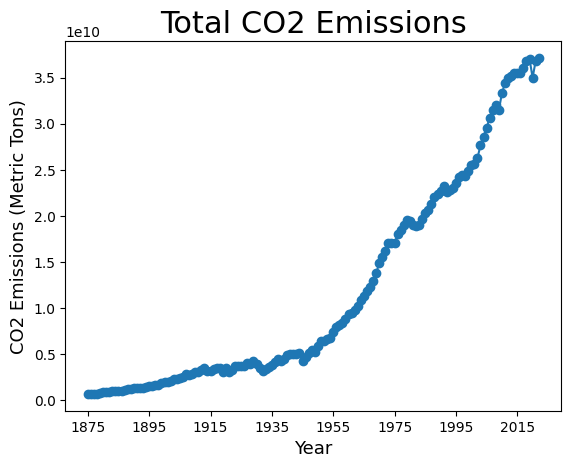

In [24]:
#plotting net CO2 emissions over time

import pandas as pd
import matplotlib.pyplot as plt

plt.plot(total_df['Year'][125:], total_df['Annual CO₂ emissions'][125:], marker='o')

plt.title('Total CO2 Emissions', fontdict={'size':22})
plt.xlabel('Year', fontdict={'size':13})
plt.ylabel('CO2 Emissions (Metric Tons)', fontdict={'size':13})

plt.xticks(total_df.iloc[125:272:20]['Year'])

plt.show()


    Year       tavg Entity      Code  Annual CO₂ emissions
0   1950  47.541667  World  OWID_WRL          5.929342e+09
1   1951  48.358333  World  OWID_WRL          6.381406e+09
2   1952  49.182161  World  OWID_WRL          6.467437e+09
3   1953  50.516667  World  OWID_WRL          6.650862e+09
4   1954  49.533333  World  OWID_WRL          6.789497e+09
..   ...        ...    ...       ...                   ...
68  2018  52.541667  World  OWID_WRL          3.676694e+10
69  2019  53.008333  World  OWID_WRL          3.704010e+10
70  2020  53.116667  World  OWID_WRL          3.500774e+10
71  2021  53.300000  World  OWID_WRL          3.681654e+10
72  2022  52.358333  World  OWID_WRL          3.714979e+10

[73 rows x 5 columns]
Rows with NaN values:
    Year  tavg Entity      Code  Annual CO₂ emissions
15  1965   NaN  World  OWID_WRL          1.130969e+10
16  1966   NaN  World  OWID_WRL          1.186171e+10
17  1967   NaN  World  OWID_WRL          1.223633e+10
18  1968   NaN  World  OWID_WRL

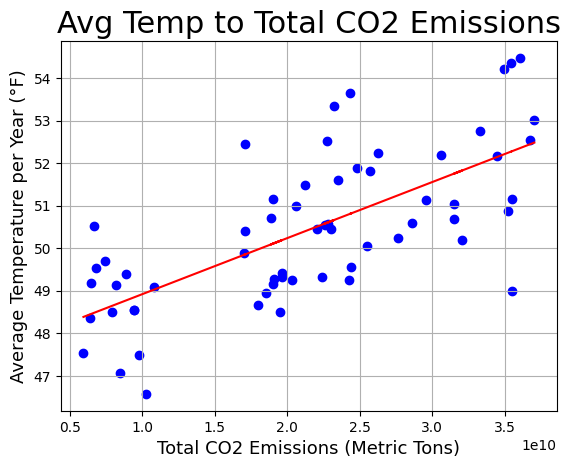

In [25]:
#temperature and emissions correlation

import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr

#find and exclude missing values
new_graph = pd.merge(yearly_avg_temp, total_df, on='Year')
print(new_graph)
rows_with_nan = new_graph[new_graph.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan)

a =  new_graph.iloc[0:15]['Annual CO₂ emissions']
a = np.append(a, new_graph.iloc[23:70]['Annual CO₂ emissions'])
b =  new_graph.iloc[0:15]['tavg']
b = np.append(b, new_graph.iloc[23:70]['tavg'])

new_graph.to_csv('TempvCO2.csv')

#compute Pearson's r
ra, pa = pearsonr(a,b)
print('Pearsons correlation: %.3f' % ra)

#determine line of best fit
slope, intercept = np.polyfit(a,b, 1)
best_fit = slope * a + intercept

print(slope, intercept)

# plot temperature vs total emissions
plt.scatter(a, b, color='blue', label='Data Points')
plt.plot(a, best_fit, color='red', label=f'Linear Fit: a = {slope:.2f}x + {intercept:.2f}')
plt.title('Avg Temp to Total CO2 Emissions', fontsize = 22)
plt.ylabel('Average Temperature per Year (°F)', fontsize = 13)
plt.xlabel('Total CO2 Emissions (Metric Tons)', fontsize = 13)
plt.grid(True)
plt.show()
